In [2]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data' 
# Load dataset into Pandas DataFrame
df = pd.read_csv(url, header=None)
# Add column names 
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# View the top 5 rows  
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
x=df.iloc[:,1:]
y=df.iloc[:,:1]

In [18]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [28]:
scaler=StandardScaler()

In [30]:
x_scaled=scaler.fit_transform(x)

In [31]:
pca=PCA()
pca.fit(x_scaled)

PCA()

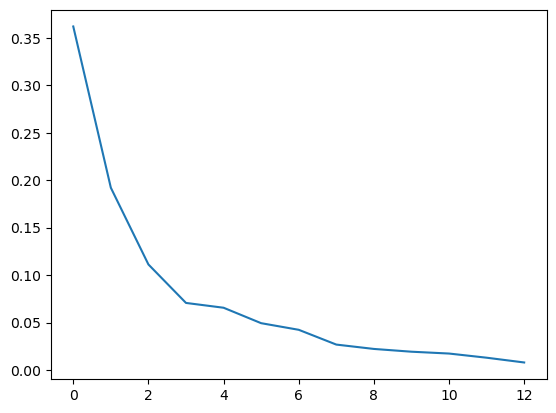

In [32]:
plt.plot(pca.explained_variance_ratio_)

In [38]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_scaled)
kmeans=KMeans(n_clusters=3)

In [39]:
y_pred=kmeans.fit_predict(x_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
print(kmeans.inertia_)

826.121107574051


In [43]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X_pca, y_pred))

0.36742672267417437


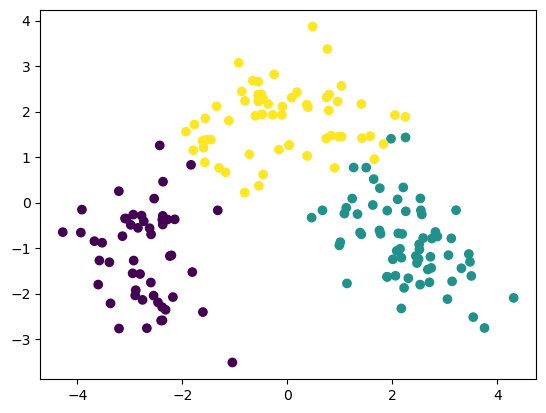

In [44]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)

In [47]:
metrics = [["Inertia", kmeans.inertia_],
["Silhouette Score", silhouette_score]]
df = pd.DataFrame(metrics, columns=["Metric", "Score"])
print(df)

             Metric                                          Score
0           Inertia                                     826.121108
1  Silhouette Score  <function silhouette_score at 0x7f019069b5b0>
